# Handwritten Digit Recognition Using PyTorch

### Setting up the Library and Importing the Dataset

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn as nn
from torchsummary import summary


### Checking the Availability of CUDA Libraries

In [2]:

print(torch.cuda.device_count(), torch.cuda.get_device_name(0), torch.cuda.is_available())

1 NVIDIA GeForce RTX 2060 True


### Import utility functions

In [3]:
from helper_train import Trainer

### Setting the hyperparameters

In [4]:
# Hyperparameters
hyperParams = {'LEARNING_RATE': 1e-3,
            'NUM_EPOCHS': 25
            }

### Loading MNIST dataset for training and testing

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transform,
    download = True
)
testset = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transform,
    download = True
)

### Loading datasets into DataLoaders

In [6]:
loaders = {
    
    'train' :  DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2),
    'test'  : DataLoader(testset, batch_size=128, shuffle=True, num_workers=2)
    }

### Analyzing and Exploring the Data
#### Dataset Summary
The MNIST dataset consists of 70,000 28x28 black-and-white images of handwritten digits extracted from two NIST databases. There are 60,000 images in the training dataset and 10,000 images in the validation dataset, one class per digit so a total of 10 classes, with 7,000 images (6,000 train images and 1,000 test images) per class. Half of the image were drawn by Census Bureau employees and the other half by high school students (this split is evenly distributed in the training and testing sets).

### Shape and Size of Datasets and Labels classes

In [7]:
data_iter = iter(loaders['train'])
images, labels = next(data_iter)

print(images.shape)
print(labels.shape)
print(labels.unique())

torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


### Display images

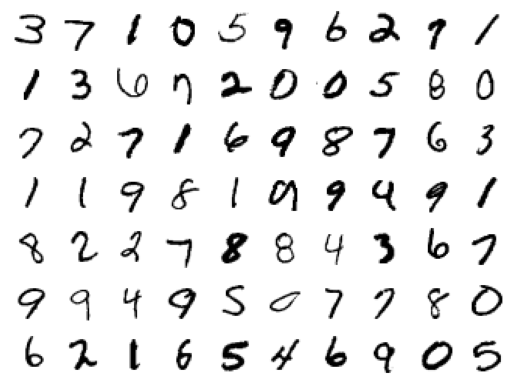

In [8]:
figure = plt.figure()
num_of_images = 70
for index in range(1, num_of_images + 1):
    plt.subplot(7, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

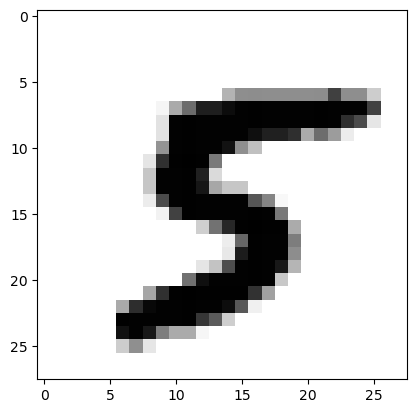

In [9]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

### Creating the Neural Network using CNN

In [10]:
import torch.nn.functional as F
class CNN(nn.Module):
    
    def __init__(self):
    
        super(CNN, self).__init__()
        #outputsize 32 x 14 x 14 if we dont add a padding with 1 it will be 32 x 13 x 13
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 2, padding = 1)#, nn.Conv2d(1, 32, 3, 1),
        #outputsize 64 x 7 x 7
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2, padding = 1)#nn.Conv2d(32, 64, 3, 1),
        
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout1d(0.5)
        
        self.act_fn = nn.ReLU()
        self.fc1 = nn.Linear(3136, 128)
        self.fc2 = nn.Linear(128, 10)
       
        
    def forward(self, x):

        x = self.conv1(x)
        x = self.act_fn(x)
        
        x = self.conv2(x)
        x = self.act_fn(x)
        
        x = self.dropout1(x)
        # convert 2d tensor to 1d tensor
        x = torch.flatten(x, 1)
       
        x = self.fc1(x)
        x = self.act_fn(x)
        
        output = self.fc2(x)
        return output
  
# check that the cuda is able to run the model in the GPU otherwise the run it in the CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# make class object of the model
model = CNN()
# loding the model into the device
model = model.to(device)

# print the summary of the model 
# 'channels' should be the first dimension, 'height' the second, and 'width' the third
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             320
              ReLU-2           [-1, 32, 14, 14]               0
            Conv2d-3             [-1, 64, 7, 7]          18,496
              ReLU-4             [-1, 64, 7, 7]               0
         Dropout2d-5             [-1, 64, 7, 7]               0
            Linear-6                  [-1, 128]         401,536
              ReLU-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.17
Params size (MB): 1.61
Estimated Total Size (MB): 1.78
----------------------------------------------------------------


### Training Of Neural Network

[1/25] Train-loss: 0.284
Time elapsed: 0.21 min
[2/25] Train-loss: 0.081
[3/25] Train-loss: 0.056
[4/25] Train-loss: 0.043
[5/25] Train-loss: 0.035
Time elapsed: 1.05 min
[6/25] Train-loss: 0.030
[7/25] Train-loss: 0.024
[8/25] Train-loss: 0.020
[9/25] Train-loss: 0.019
Time elapsed: 1.87 min
[10/25] Train-loss: 0.016
[11/25] Train-loss: 0.014
[12/25] Train-loss: 0.012
[13/25] Train-loss: 0.012
Time elapsed: 2.70 min
[14/25] Train-loss: 0.012
[15/25] Train-loss: 0.010
[16/25] Train-loss: 0.010
[17/25] Train-loss: 0.009
Time elapsed: 3.51 min
[18/25] Train-loss: 0.007
[19/25] Train-loss: 0.008
[20/25] Train-loss: 0.007
[21/25] Train-loss: 0.007
Time elapsed: 4.32 min
[22/25] Train-loss: 0.007
[23/25] Train-loss: 0.006
[24/25] Train-loss: 0.008
[25/25] Train-loss: 0.006
Time elapsed: 5.15 min
Total Training Time: 5.15 min


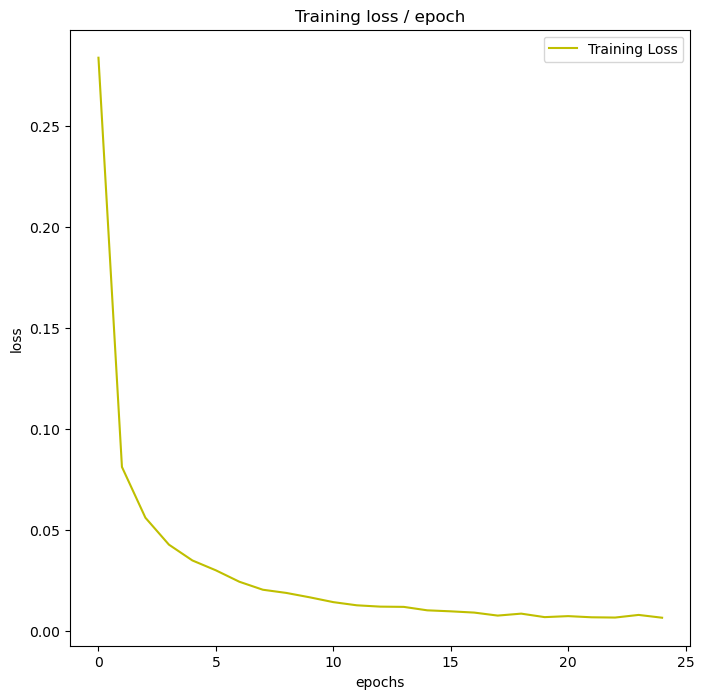

In [11]:
trainer = Trainer(model, hyperParams = hyperParams, DataLoders = loaders)
trainer.train()

### Visualizing the Machine Learning Model performance

Predicted Digit = 0


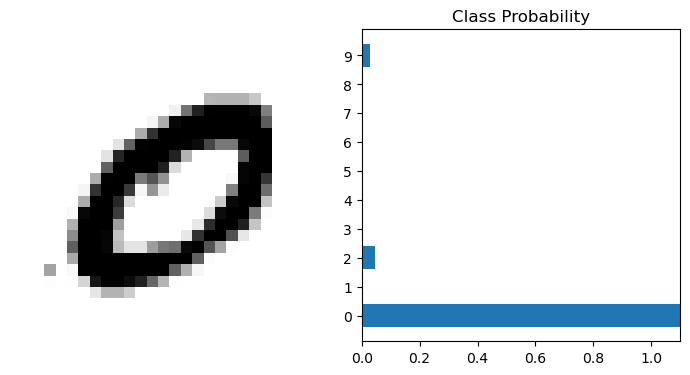

In [12]:
def classify(img, output):
    ''' Function shows an image and it's predicted classes.
    '''
    output = output.cpu().detach().numpy().squeeze()
    
    fig, (ax1, ax2) = plt.subplots(figsize=(7,10), ncols=2)
    ax1.imshow(img[0].resize_(1, 28, 28).cpu().numpy().squeeze(),cmap='gray_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), output[0])
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    
data_iter = iter(loaders['test'])
images, labels = next(data_iter)

img = images.to(device)
with torch.no_grad():
    output = model(img)

output_ex = torch.exp(output)
predited_list = list(output_ex.cpu().numpy()[0])
print("Predicted Digit =", predited_list.index(max(predited_list)))
classify(img.view(-1, 1, 28, 28), output_ex)

Prediction: 2


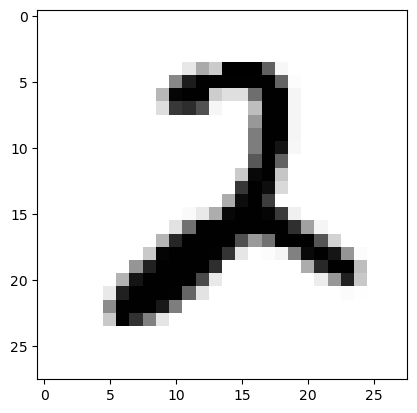

In [13]:
model.eval()
data, target = next(iter(loaders['test']))
data = data.to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True)[0].item()
print(f"Prediction: {prediction}")
image = data[0].squeeze().cpu().numpy()

plt.imshow(image,cmap='gray_r');

### Model Evaluation

In [14]:
correct_count, all_count = 0, 0
for images,labels in loaders['test']:
  for i in range(len(labels)):
    img = images[i].unsqueeze(0).to(device)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9885
